<a href="https://colab.research.google.com/github/francobarrionuevoenv21/MHW_xarray_mapping/blob/main/nbks_examples/exampleMHW_Urg-Brz17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notebook description**
---
This notebook shows a usage example of the MHW XArray Mapping module to create maps of ocean warming events intensity using the methodology defined by [Hobday et al. (2016)](https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057). Input data must be Sea Surface Temperature (SST) with a daily temporal resolution. For further information check the GitHub repo documentation.

This notebook works with example data for the Uruguay-Brazil coast region provided in the GitHub repo.

In [ ]:
# Clone GitHub repo
!git clone https://github.com/francobarrionuevoenv21/MHW_xarray_mapping.git

# Add the module path to use it as a Python package
import sys
sys.path.append("/content/MHW_xarray_mapping")

# Install Cartopy if necessary
#!pip install cartopy

In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Import MHW mapping modules
from mhwxamap.mhwMap import mapIntensityCont as micn
from mhwxamap.mhwMap import mapIntensityCat as micg

In [18]:
# Define main parameters
## NOTE: For further details about other parameters check documentation in the repo
PATH_SST = "/content/MHW_xarray_mapping/data_example/oisst_1983-2018_TestSubset.nc" ## Define SST data path
MHW_DATE = "2017-03-1" ## Define date to map. It could be the MHW peak or any other data to analyze

# Compute intensity for mapping
map_cont = micn(PATH_SST, MHW_DATE)
map_catg = micg(PATH_SST, MHW_DATE)

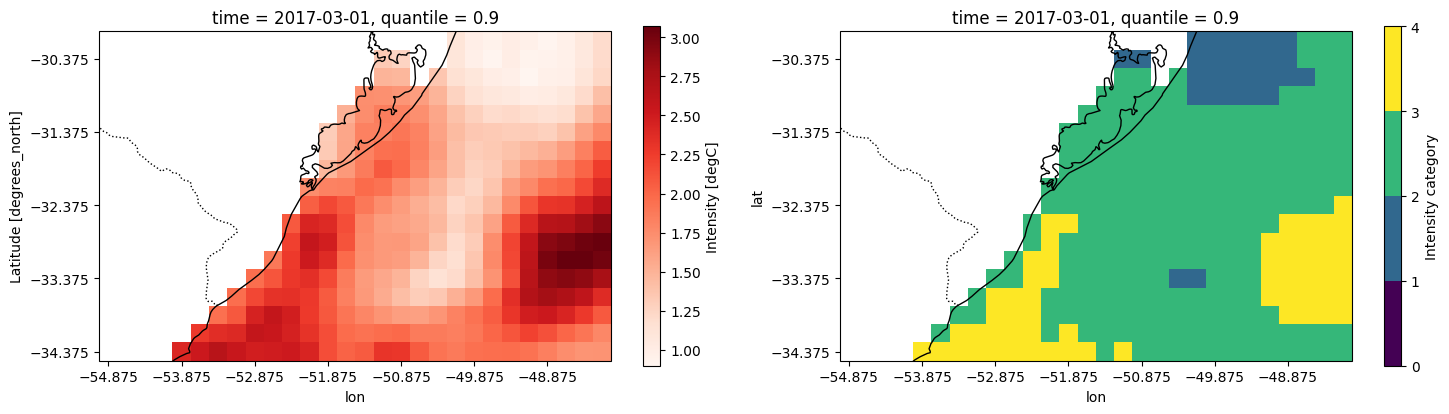

In [29]:
# Plot MHW intensity maps
fig, axs = plt.subplots(1, 2, figsize=(15, 4), subplot_kw={'projection': ccrs.PlateCarree()})

map_cont.plot(ax = axs[0], cmap ="Reds")
map_catg.plot(ax = axs[1], vmin = 0, vmax = 4, levels = 5)

for i in range(2):
  axs[i].add_feature(cfeature.COASTLINE)
  axs[i].add_feature(cfeature.BORDERS, linestyle=':')
  axs[i].set_xticks(np.arange(map_cont.lon.min(), map_cont.lon.max(), 1),
                    crs=ccrs.PlateCarree())
  axs[i].set_yticks(np.arange(map_cont.lat.min(), map_cont.lat.max(), 1),
                    crs=ccrs.PlateCarree())

plt.tight_layout()